In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Input
from tensorflow.keras.layers import Input, Flatten, Dense

**Implement an extremely simple CNN**

Found 32000 images belonging to 5 classes.
Found 7997 images belonging to 5 classes.


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 259s 257ms/step - accuracy: 0.4977 - loss: 1.2198 - val_accuracy: 0.7555 - val_loss: 0.6971
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 272s 271ms/step - accuracy: 0.7790 - loss: 0.6387 - val_accuracy: 0.8169 - val_loss: 0.5316
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 389s 388ms/step - accuracy: 0.8285 - loss: 0.4904 - val_accuracy: 0.8343 - val_loss: 0.4917
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 408s 407ms/step - accuracy: 0.8590 - loss: 0.4152 - val_accuracy: 0.8522 - val_loss: 0.4588
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 386s 386ms/step - accuracy: 0.8804 - loss: 0.3593 - val_accuracy: 0.8571 - val_loss: 0.4111
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 340s 339ms/step - accuracy: 0.8930 - loss: 0.3168 - val_accuracy: 0.8621 - val_loss: 0.4043
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 296s 296ms/step - accuracy: 0.9050 - loss: 0.2905 - val_accuracy: 0.8903 - val_loss: 0.3391
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 259s 259ms/step - accuracy: 0.9

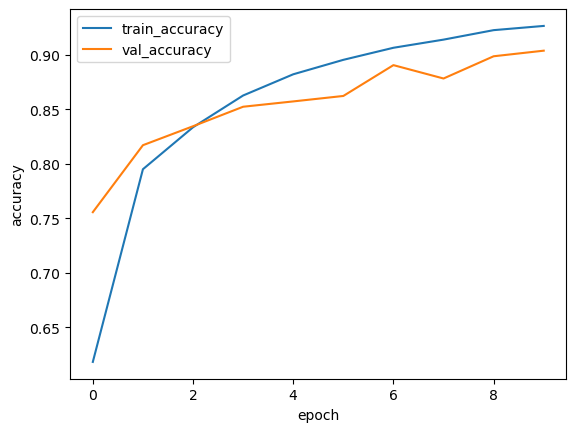

In [3]:
base_path = '/Users/dbstj0426/Desktop/pathogen'

# Load the data
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = datagen.flow_from_directory(base_path,
                                              target_size=(128, 128),
                                              batch_size=32,
                                              class_mode='categorical',
                                              subset='training')
val_generator = datagen.flow_from_directory(base_path,
                                            target_size=(128, 128),
                                            batch_size=32,
                                            class_mode='categorical',
                                            subset='validation')

# Implement the CNN
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(GlobalAveragePooling2D())
model.add(Dense(5, activation='softmax')) 

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, validation_data=val_generator, epochs=10)

# Plot the training history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'], loc='best')
plt.show()




In [4]:
# test accuracy and traning accuracy
print('train accuracy :', history.history['accuracy'][-1])
print('Test accuracy :', history.history['val_accuracy'][-1])

train accuracy : 0.9262812733650208
Test accuracy : 0.9035888314247131


**Improve the model**

Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 145s 142ms/step - accuracy: 0.3031 - loss: 1.5294 - val_accuracy: 0.4548 - val_loss: 1.3584
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 148s 147ms/step - accuracy: 0.3991 - loss: 1.3846 - val_accuracy: 0.4741 - val_loss: 1.3228
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 151s 150ms/step - accuracy: 0.4353 - loss: 1.3437 - val_accuracy: 0.4238 - val_loss: 1.3292
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 153s 153ms/step - accuracy: 0.4591 - loss: 1.3057 - val_accuracy: 0.3980 - val_loss: 1.3144
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 170s 169ms/step - accuracy: 0.4844 - loss: 1.2687 - val_accuracy: 0.4901 - val_loss: 1.2922
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 167s 166ms/step - accuracy: 0.5063 - loss: 1.2443 - val_accuracy: 0.4599 - val_loss: 1.3096
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 170s 169ms/step - accuracy: 0.5201 - loss: 1.2262 - val_accuracy: 0.5226 - val_loss: 1.2650
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 187s 186ms/step - ac

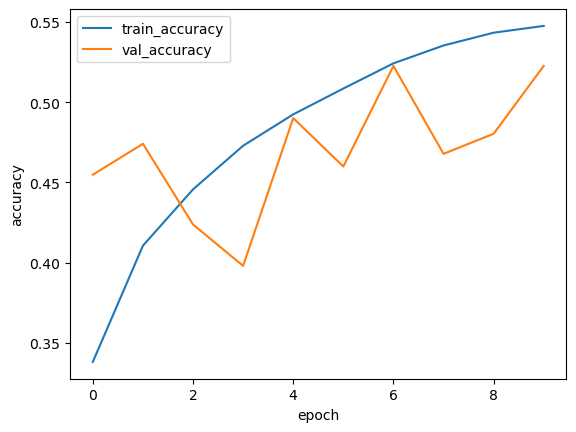

In [5]:
# Use transfer learning to improve the model
# MobileNetV2
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False

inputs = Input(shape=(128, 128, 3))
x = preprocess_input(inputs)
x = base_model(x, training=False)
x = GlobalAveragePooling2D()(x)
outputs = Dense(5, activation='softmax')(x)
model = Model(inputs, outputs)

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator, validation_data=val_generator, epochs=10)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'], loc='best')
plt.show()


Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 255s 250ms/step - accuracy: 0.2082 - loss: 1.6191 - val_accuracy: 0.2002 - val_loss: 1.6037
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 261s 260ms/step - accuracy: 0.2265 - loss: 1.6094 - val_accuracy: 0.2177 - val_loss: 1.5975
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 266s 265ms/step - accuracy: 0.2319 - loss: 1.6054 - val_accuracy: 0.2465 - val_loss: 1.5974
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 286s 286ms/step - accuracy: 0.2511 - loss: 1.5976 - val_accuracy: 0.2197 - val_loss: 1.5833
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 264s 263ms/step - accuracy: 0.2503 - loss: 1.5943 - val_accuracy: 0.2235 - val_loss: 1.5841
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 261s 260ms/step - accuracy: 0.2508 - loss: 1.5929 - val_accuracy: 0.2672 - val_loss: 1.5794
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 853s 852ms/step - accuracy: 0.2533 - loss: 1.5890 - val_accuracy: 0.2561 - val_loss: 1.5688
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 3424s 3s/step - accu

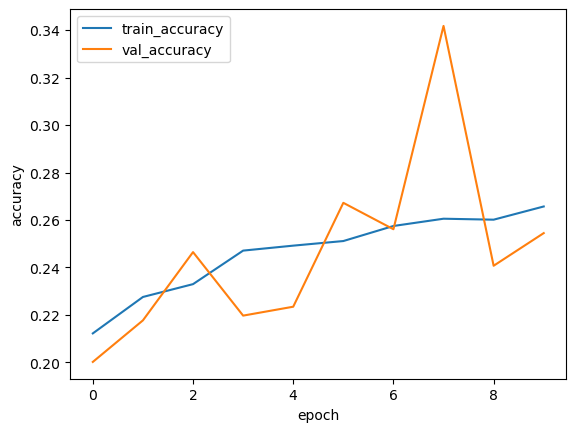

In [6]:
# EfficientNetV2B0
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input

base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False

inputs = Input(shape=(128, 128, 3))
x = preprocess_input(inputs)
x = base_model(x, training=False)
x = GlobalAveragePooling2D()(x)
outputs = Dense(5, activation='softmax')(x)
model = Model(inputs, outputs)

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator, validation_data=val_generator, epochs=10)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'], loc='best')
plt.show()

Epoch 1/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 362s 358ms/step - accuracy: 0.5523 - loss: 1.1427 - val_accuracy: 0.5475 - val_loss: 1.1587
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 405s 404ms/step - accuracy: 0.7014 - loss: 0.8170 - val_accuracy: 0.5788 - val_loss: 1.1353
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 404s 404ms/step - accuracy: 0.7344 - loss: 0.7440 - val_accuracy: 0.5755 - val_loss: 1.1640
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 400s 399ms/step - accuracy: 0.7528 - loss: 0.6959 - val_accuracy: 0.5975 - val_loss: 1.0849
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 387s 386ms/step - accuracy: 0.7622 - loss: 0.6693 - val_accuracy: 0.6035 - val_loss: 1.1112
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 363s 362ms/step - accuracy: 0.7689 - loss: 0.6502 - val_accuracy: 0.5926 - val_loss: 1.1938
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 380s 379ms/step - accuracy: 0.7782 - loss: 0.6297 - val_accuracy: 0.6110 - val_loss: 1.1496
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 402s 402ms/step - ac

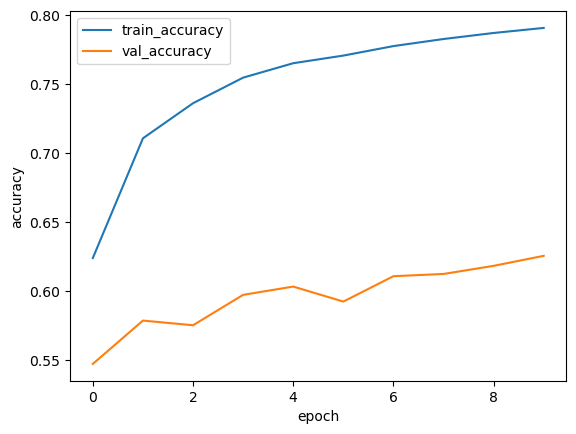

In [8]:
# InceptionV3
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False

inputs = Input(shape=(128, 128, 3))
x = preprocess_input(inputs)
x = base_model(x, training=False)
x = GlobalAveragePooling2D()(x)
outputs = Dense(5, activation='softmax')(x)
model = Model(inputs, outputs)

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator, validation_data=val_generator, epochs=10)

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy', 'val_accuracy'], loc='best')
plt.show()
